In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit,njit,prange
import imageio
import time

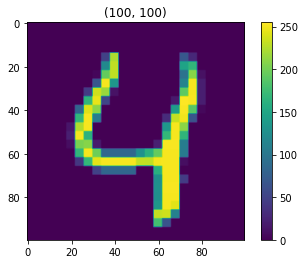

In [3]:
image=imageio.imread('4.png')

number4=np.ascontiguousarray(image[365:465,365:465])
#number4=np.random.rand(10,10)*255
plt.title(number4.shape)
plt.imshow(number4)
plt.colorbar()
plt.show()

Elapsed (with compilation) = 3.121717929840088


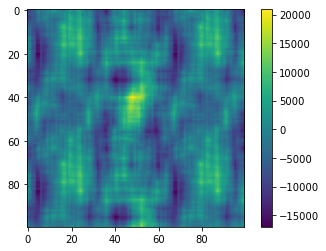

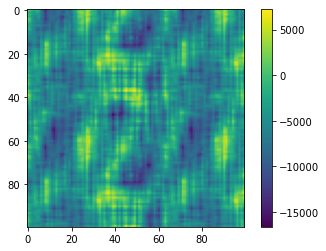

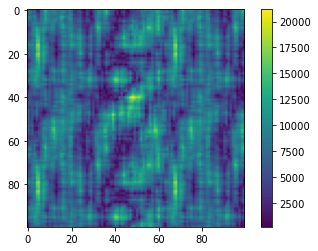

In [11]:
@njit(parallel=True)
def go_fast(a,dis): # Function is compiled and runs in machine code
    x1=np.zeros((100,100))*1j
    wavelength=630e-9
    pitch=7.6e-6
    for i in prange(100):
        for j in prange(100):
            for i1 in prange(100):
                for j1 in prange(100):
                    x1[i,j]+=a[i1,j1]*np.exp(1j*2*np.pi*((i-i1)**2+(j-j1)**2+(dis/pitch)**2)*pitch/wavelength)
    return x1

start = time.time()
x2=go_fast(number4,1e-2)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

plt.imshow(x2.real)
plt.colorbar()
plt.show()
plt.imshow(x2.imag)
plt.colorbar()
plt.show()
plt.imshow(np.abs(x2))
plt.colorbar()
plt.show()